In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,datasets

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train ,x_test = x_train /255.0,x_test /255.0

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
import cv2
from google.colab.patches import cv2_imshow

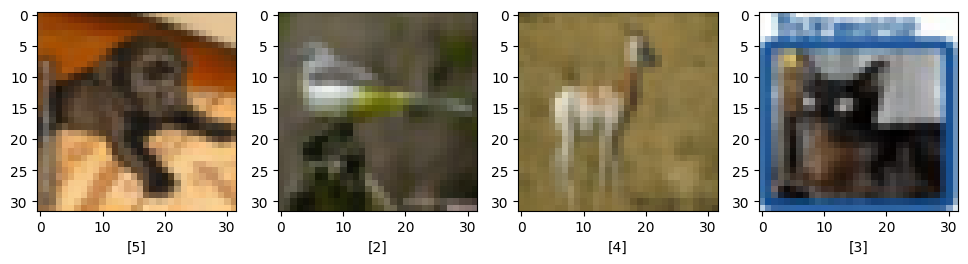

In [4]:
plt.figure(figsize=(15,15))
pl = 1
for i in range(56,60):
  plt.subplot(5,5,pl)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
  pl +=1


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation ='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

In [8]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

In [9]:
history = model.fit(x_train,y_train,validation_split=.1,epochs = 50)

Epoch 1/50
1407/1407 [==============================] - 17s 7ms/step - loss: 1.6307 - accuracy: 0.3965 - val_loss: 1.2556 - val_accuracy: 0.5490
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2045 - accuracy: 0.5678 - val_loss: 1.1493 - val_accuracy: 0.5866
Epoch 3/50
1407/1407 [==============================] - 8s 5ms/step - loss: 1.0558 - accuracy: 0.6273 - val_loss: 0.9402 - val_accuracy: 0.6692
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9384 - accuracy: 0.6729 - val_loss: 0.9459 - val_accuracy: 0.6728
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8586 - accuracy: 0.7012 - val_loss: 0.9415 - val_accuracy: 0.6740
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7841 - accuracy: 0.7276 - val_loss: 0.8826 - val_accuracy: 0.6910
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7274 - accuracy: 0.7454 - val_loss: 0.8710 - val_accuracy

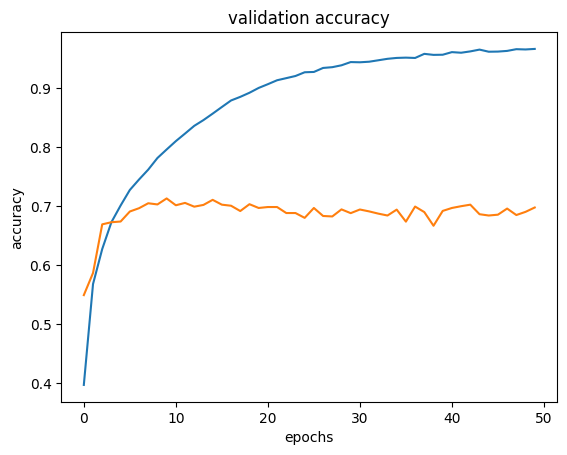

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('validation accuracy')
plt.show()

In [11]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6804